# Objective

To predict laboratory classifications agreements/disagreements (target variable) using measured (predicted) feature variables. This is presented here as a binary classification problem, where each record in the dataset is a genetic variant.

Conflicting classification has been assigned to the CLASS column of the data. It is a binary representation of whether or not a variant has conflicting classifications, where 0 represents consistent classifications and 1 represents conflicting classifications.

# Import necessary libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Read the data

In [2]:
gv=pd.read_csv(r"C:\Users\HP\Desktop\DS\clinvar_conflicting.csv")
gv.shape

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(65188, 46)

In [3]:
gv.head(100)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,CLASS
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,01-Jan,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0,0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,04-Apr,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0,0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,06-Dec,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0,1
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,01-Jul,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN,0
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,01-Jul,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0,0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160554G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):P12755#VAR_071183,SO:0001583|missense_variant,33,NaN,C,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,01-Jul,NaN,381,349,117,G/R,Ggc/Cgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0,0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328358T>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031433,SO:0001583|missense_variant,1,NaN,C,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,Sep-17,NaN,1858,1600,534,S/P,Tcg/Ccg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1010,0.172,-0.543433,-1.0,0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328659C>T,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031434,SO:0001583|missense_variant,1,NaN,T,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,Sep-17,NaN,2159,1901,634,P/L,cCt/cTt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1010,23.000,3.424422,-3.0,0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,NaN,

In [4]:
gv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

# Check nulls

In [5]:
gv.isnull().sum().sort_values(ascending = False)*100/len(gv)

MOTIF_SCORE_CHANGE    99.996932
HIGH_INF_POS          99.996932
MOTIF_POS             99.996932
MOTIF_NAME            99.996932
DISTANCE              99.834325
SSR                   99.800577
CLNDNINCL             99.743818
CLNDISDBINCL          99.743818
CLNSIGINCL            99.743818
INTRON                86.495981
PolyPhen              61.962324
SIFT                  61.900963
BLOSUM62              60.739707
CLNVI                 57.570412
BAM_EDIT              50.958765
Codons                15.346383
Amino_acids           15.346383
Protein_position      15.271216
CDS_position          15.271216
EXON                  13.642081
cDNA_position         13.628275
LoFtool                6.462846
CADD_PHRED             1.675155
CADD_RAW               1.675155
MC                     1.297785
BIOTYPE                0.024544
SYMBOL                 0.024544
Feature_type           0.021476
Feature                0.021476
STRAND                 0.021476
ALT                    0.000000
AF_ESP  

Drop those columns which have more than 80% nulls

In [6]:
gv= gv.drop(['MOTIF_SCORE_CHANGE','HIGH_INF_POS','MOTIF_POS','MOTIF_NAME','DISTANCE',
             'SSR','CLNSIGINCL','CLNDNINCL','CLNDISDBINCL','INTRON'],axis=1)

In [7]:
gv.STRAND .describe()  

count    65174.000000
mean        -0.006659
std          0.999985
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          1.000000
max          1.000000
Name: STRAND, dtype: float64

Fill our Nulls

In [8]:
gv.fillna(-99999, inplace=True)

In [9]:
gv.PolyPhen = gv.PolyPhen.fillna("benign")
gv.SIFT = gv.SIFT.fillna("deleterious")
gv.CLNVI = gv.CLNVI.fillna("OMIM_Allelic_Variant:609332.0008")
gv.BAM_EDIT = gv.BAM_EDIT.fillna("OK")
gv.Codons = gv.Codons.fillna(" cGg/cAg")
gv.Amino_acids  = gv.Amino_acids .fillna("A")
gv.Protein_position = gv.Protein_position.fillna("1")
gv.CDS_position = gv.CDS_position.fillna("1")
gv.EXON = gv.EXON.fillna("16/16")
gv.cDNA_position = gv.cDNA_position.fillna("852")
gv.CADD_PHRED = gv.CADD_PHRED.fillna(gv.CADD_PHRED.mean())
gv.CADD_RAW  = gv.CADD_RAW.fillna(gv.CADD_RAW.mean())
gv.MC = gv.MC.fillna(" SO:0001583|missense_variant")

In [10]:
gv.BLOSUM62 = gv.BLOSUM62.fillna(gv.BLOSUM62.mean())
gv.LoFtool  = gv.LoFtool .fillna(gv.LoFtool.mean())

In [11]:
gv.isnull().sum().sort_values(ascending = False)*100/len(gv)

CLASS               0.0
BLOSUM62            0.0
Consequence         0.0
Allele              0.0
ORIGIN              0.0
MC                  0.0
CLNVI               0.0
CLNVC               0.0
CLNHGVS             0.0
CLNDN               0.0
CLNDISDB            0.0
AF_TGP              0.0
AF_EXAC             0.0
AF_ESP              0.0
ALT                 0.0
REF                 0.0
POS                 0.0
IMPACT              0.0
SYMBOL              0.0
Feature_type        0.0
STRAND              0.0
CADD_RAW            0.0
CADD_PHRED          0.0
LoFtool             0.0
PolyPhen            0.0
SIFT                0.0
BAM_EDIT            0.0
Codons              0.0
Feature             0.0
Amino_acids         0.0
Protein_position    0.0
CDS_position        0.0
cDNA_position       0.0
EXON                0.0
BIOTYPE             0.0
CHROM               0.0
dtype: float64

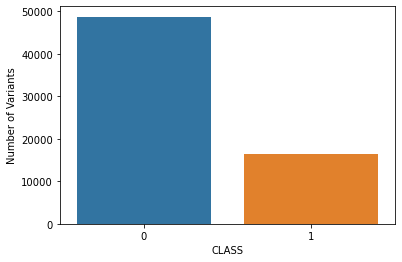

In [12]:
ax = sns.countplot(x="CLASS", data=gv)
ax.set(xlabel='CLASS', ylabel='Number of Variants');

It's clear that conflicting variants are more common in some genes

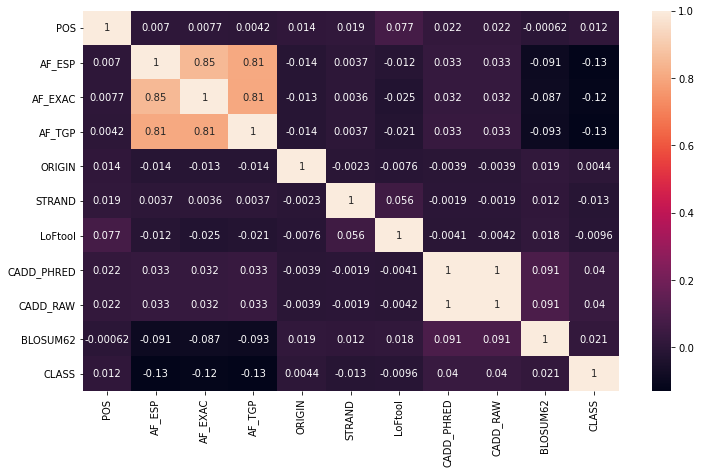

In [13]:
plt.figure(figsize=(12,7))
correlation = gv.corr()
sns.heatmap(correlation, annot = True);

Most allele frequencies are very low

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

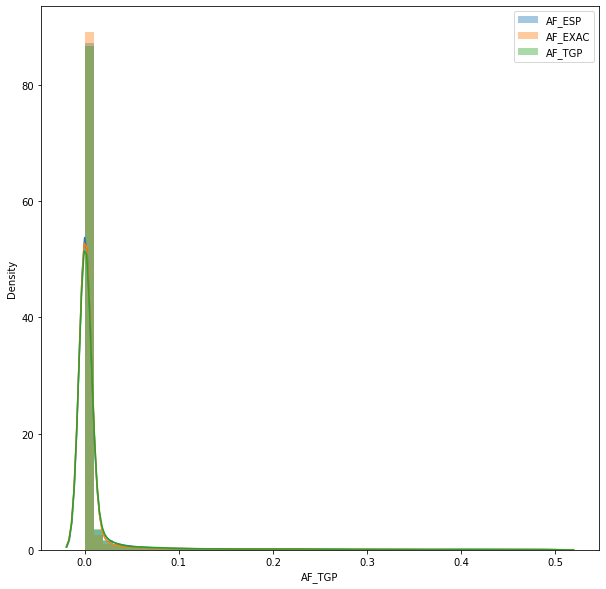

In [14]:
fig = plt.figure(figsize=(10,10))
sns.distplot(gv.AF_ESP, label="AF_ESP")
sns.distplot(gv.AF_EXAC, label="AF_EXAC")
sns.distplot(gv.AF_TGP, label="AF_TGP")
plt.legend();

In [15]:
gv['CLNDISDB'] = le.fit_transform(gv['CLNDISDB'].astype(str))
gv['CLNDN'] = le.fit_transform(gv['CLNDN'].astype(str))
gv['CLNHGVS'] = le.fit_transform(gv['CLNHGVS'].astype(str))
gv['CLNVC'] = le.fit_transform(gv['CLNVC'].astype(str))
gv['CLNVI'] = le.fit_transform(gv['CLNVI'].astype(str))
gv['MC'] = le.fit_transform(gv['MC'].astype(str))
gv['Consequence'] = le.fit_transform(gv['Consequence'].astype(str))
gv['IMPACT'] = le.fit_transform(gv['IMPACT'].astype(str))
gv['SYMBOL'] = le.fit_transform(gv['SYMBOL'].astype(str))
gv['Feature_type'] = le.fit_transform(gv['Feature_type'].astype(str))
gv['Feature'] = le.fit_transform(gv['Feature'].astype(str))
gv['BIOTYPE'] = le.fit_transform(gv['BIOTYPE'].astype(str))
gv['Amino_acids'] = le.fit_transform(gv['Amino_acids'].astype(str))
gv['Codons'] = le.fit_transform(gv['Codons'].astype(str))
gv['BAM_EDIT'] = le.fit_transform(gv['BAM_EDIT'].astype(str))
gv['SIFT'] = le.fit_transform(gv['SIFT'].astype(str))
gv['PolyPhen'] = le.fit_transform(gv['PolyPhen'].astype(str))
gv['EXON'] = le.fit_transform(gv['EXON'].astype(str))
gv['Allele'] = le.fit_transform(gv['Allele'].astype(str))
gv['REF'] = le.fit_transform(gv['REF'].astype(str))
gv['ALT'] = le.fit_transform(gv['ALT'].astype(str))

In [16]:
gv['CHROM'] = le.fit_transform(gv['CHROM'].astype(str))
gv['cDNA_position'] = le.fit_transform(gv['cDNA_position'].astype(str))
gv['CDS_position'] = le.fit_transform(gv['CDS_position'].astype(str))
gv['Protein_position'] = le.fit_transform(gv['Protein_position'].astype(str))

In [17]:
gv.head(100)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,MC,ORIGIN,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,CLASS
0,0,1168180,437,106,0.0771,0.10020,0.1066,8866,8960,326,6,27451,20,1,88,17,2,201,2,1701,2,5,8896,8317,1452,258,1654,1.0,0,3,1,-99999.0000,1.053,-0.208682,2.0,0
1,0,1470752,437,0,0.0000,0.00000,0.0000,6615,8388,467,6,25426,20,1,1,17,2,2136,2,464,2,34,8470,8141,1378,757,1144,-1.0,2,2,1,-99999.0000,31.000,6.517838,-3.0,0
2,0,1737942,0,213,0.0000,0.00001,0.0000,750,8449,1179,6,23932,25,35,168,17,2,893,2,850,2,52,9963,4000,6806,481,814,-1.0,2,1,3,-99999.0000,28.100,6.061752,-1.0,1
3,0,2160305,437,0,0.0000,0.00000,0.0000,5993,8156,1826,6,24044,20,33,1,17,2,1889,2,1894,2,6,1616,7,4573,378,524,1.0,0,0,0,-99999.0000,22.500,3.114491,-99999.0,0
4,0,2160305,437,335,0.0000,0.00000,0.0000,5989,8154,1827,6,24045,20,33,296,17,2,1889,2,1894,2,6,1616,7,4573,363,526,1.0,0,0,0,-99999.0000,24.700,4.766224,-3.0,0
5,0,2160554,437,106,0.0000,0.00000,0.0000,5993,8156,1846,6,26300,20,33,88,17,2,1889,2,1894,2,6,6404,5843,359,377,525,1.0,0,0,0,-99999.0000,23.700,4.079099,-2.0,0
6,0,3328358,644,106,0.0000,0.00000,0.0000,8866,8960,3069,6,27517,20,1,88,17,2,1651,2,1893,2,3215,3011,2404,5974,987,627,1.0,0,0,0,0.1010,0.172,-0.543433,-1.0,0
7,0,3328659,224,335,0.1523,0.13103,0.1060,8866,8960,3073,6,27518,20,1,296,17,2,1651,2,1893,2,3215,3630,3051,6315,757,1148,1.0,0,0,0,0.1010,23.000,3.424422,-3.0,0
8,0,3347452,437,0,0.0000,0.00357,0.0030,8421,5023,3099,6,24815,20,1,1,17,2,1651,2,1893,2,354,6048,5562,227,1157,544,1.0,0,0,0,0.1010,11.360,1.126629,1.0,1
9,0,5925304,437,0,0.0045,0.00231,0.0058,5578,6534,3931,6,25908,20,1,1,17,2,1446,2,1351,2,1102,6604,6120,455,1080,749,-1.0,0,1,1,0.0210,22.100,2.969650,-1.0,0


# Split the data

In [18]:
gv_train, gv_test = train_test_split(gv, test_size=.2)

In [19]:
gv_train_x= gv_train.iloc[:,0:-1]
gv_train_y=gv_train.iloc[:,-1]

gv_test_x= gv_test.iloc[:,0:-1]
gv_test_y=gv_test.iloc[:,-1]

In [20]:
gv_train_x.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,MC,ORIGIN,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
62647,21,135172392,643,213,0.0000,0.00000,0.0000,6917,8391,28206,0,0,54,9,0,4,0,1860,2,2322,2,365,9697,9170,1889,142,420,-1.0,0,0,0,0.0245,-99999.00,-99999.000000,-99999.0
41779,11,179404293,437,0,0.0015,0.00429,0.0060,1314,4371,5982,6,7947,90,1,1,46,1,2208,2,649,2,1564,13843,13519,4378,578,1419,-1.0,0,0,0,0.9710,12.07,1.262385,-99999.0
16940,3,14018852,224,335,0.0002,0.00011,0.0000,8866,8960,38509,6,0,90,1,296,46,1,922,2,317,2,2778,7731,4936,7246,1143,1880,-1.0,0,0,0,0.1690,10.81,1.025938,-99999.0
24830,7,1270166,224,335,0.0090,0.01010,0.0048,439,4549,46446,6,0,90,1,296,46,1,280,2,2070,2,1428,9894,9696,2158,168,2140,1.0,0,0,0,0.0051,11.43,1.139993,-99999.0
50499,16,5586367,437,106,0.0171,0.00522,0.0128,9000,9068,16405,6,14316,20,1,88,17,2,691,2,1761,2,497,5308,5152,39,607,374,-1.0,2,1,3,0.9470,24.00,4.279820,1.0


In [21]:
gv_train_y.head()

62647    0
41779    1
16940    1
24830    0
50499    0
Name: CLASS, dtype: int64

In [22]:
gv_test_x.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,MC,ORIGIN,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
2618,21,94830377,0,335,0.0001,0.00001,0.0000,3216,6634,29750,6,24830,20,1,296,17,2,2019,2,669,2,2941,8643,7047,859,1147,1623,-1.0,2,0,0,0.286,28.100,6.054025,-3.0
55965,18,116949359,437,0,0.0115,0.01240,0.0060,2235,1477,20646,6,22239,20,1,1,17,2,1794,2,352,2,28,2519,2118,5821,1155,540,1.0,2,3,1,0.990,3.080,0.049739,3.0
42353,11,179435968,437,0,0.0012,0.00036,0.0012,1314,4371,6560,6,15184,20,1,1,17,2,2208,2,649,2,1418,11352,11155,2931,757,1148,-1.0,0,0,0,0.971,19.560,2.515064,-3.0
8857,0,201021678,224,335,0.0032,0.00116,0.0052,3368,5556,1488,6,13847,82,1,296,31,1,281,2,26,2,0,0,0,0,78,95,-1.0,0,0,0,0.030,8.634,0.670733,-99999.0
63946,23,32583923,644,106,0.0001,0.00155,0.0005,3036,2330,64512,6,0,20,1,88,17,2,575,2,998,2,474,3579,3023,6305,1073,196,-1.0,2,3,1,0.342,0.321,-0.433504,-99999.0


In [23]:
gv_test_y.head()

2618     0
55965    1
42353    1
8857     0
63946    0
Name: CLASS, dtype: int64

# LOGISTIC REGRESSION

In [24]:
log_reg = LogisticRegression()
log_reg.fit(gv_train_x,gv_train_y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
pred_test  = log_reg.predict(gv_test_x)
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
tab1 = confusion_matrix(pred_test,gv_test_y)
tab1

array([[9704, 3183],
       [  80,   71]], dtype=int64)

In [27]:
acc_logreg = accuracy_score(pred_test , gv_test_y)*100
acc_logreg

74.97315539193127

# Decision Tree

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dtc = AdaBoostClassifier(dt , n_estimators = 20)

In [30]:
dtc.fit(gv_train_x , gv_train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

In [31]:
pred_dtc = dtc.predict(gv_test_x)
pred_dtc

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [32]:
tab_dtc = confusion_matrix(pred_dtc , gv_test_y)
tab_dtc

array([[8021, 1668],
       [1763, 1586]], dtype=int64)

In [33]:
acc_dtc = accuracy_score(pred_dtc , gv_test_y)*100
acc_dtc

73.68461420463261

In [34]:
dtc.feature_importances_

array([0.01652349, 0.05158581, 0.01619917, 0.0124205 , 0.02642074,
       0.10834503, 0.06795499, 0.06275403, 0.05050378, 0.05370391,
       0.00083626, 0.05927258, 0.02247739, 0.00343608, 0.01027368,
       0.00696512, 0.0109037 , 0.03451176, 0.        , 0.03592187,
       0.        , 0.03475604, 0.03312341, 0.03605747, 0.03430306,
       0.03150179, 0.03701861, 0.00411392, 0.00480157, 0.00632359,
       0.00729314, 0.03769444, 0.03336745, 0.03959315, 0.00904245])

In [35]:
feature_importance = pd.DataFrame({"Features" : gv_train_x.columns , "Score":dtc.feature_importances_})

In [36]:
feature_importance

,Features,Score
0,CHROM,0.016523
1,POS,0.051586
2,REF,0.016199
3,ALT,0.012421
4,AF_ESP,0.026421
5,AF_EXAC,0.108345
6,AF_TGP,0.067955
7,CLNDISDB,0.062754
8,CLNDN,0.050504
9,CLNHGVS,0.053704


# RandomForest

In [37]:
rf= RandomForestClassifier()

In [38]:
rfc = AdaBoostClassifier(rf , n_estimators = 20)

In [39]:
rfc.fit(gv_train_x, gv_train_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=20)

In [40]:
pred_rfc = rfc.predict(gv_test_x)

In [41]:
tab_rfc = confusion_matrix(pred_rfc , gv_test_y)
tab_rfc     

array([[9460, 2264],
       [ 324,  990]], dtype=int64)

In [71]:
acc_rf = accuracy_score(pred_rfc , gv_test_y)*100
acc_rf

80.15032980518484

In [42]:
rfc.feature_importances_ 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:590: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [43]:
feature_importance_rf = pd.DataFrame({"Features" : gv_train_x.columns , "Score":rfc.feature_importances_})

In [44]:
feature_importance_rf

,Features,Score
0,CHROM,NaN
1,POS,NaN
2,REF,NaN
3,ALT,NaN
4,AF_ESP,NaN
5,AF_EXAC,NaN
6,AF_TGP,NaN
7,CLNDISDB,NaN
8,CLNDN,NaN
9,CLNHGVS,NaN


# Comparison of Feature Importance

In [72]:
gv_fi =pd.DataFrame({"Features":gv_train_x.columns, "Decision Tree":dtc.feature_importances_,
                    "Random forest":rfc.feature_importances_}) 



C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:590: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


In [46]:
gv_fi

,Features,Decision Tree,Random forest
0,CHROM,0.016523,NaN
1,POS,0.051586,NaN
2,REF,0.016199,NaN
3,ALT,0.012421,NaN
4,AF_ESP,0.026421,NaN
5,AF_EXAC,0.108345,NaN
6,AF_TGP,0.067955,NaN
7,CLNDISDB,0.062754,NaN
8,CLNDN,0.050504,NaN
9,CLNHGVS,0.053704,NaN


From this we get to know the most important feature using decision tree and random forest

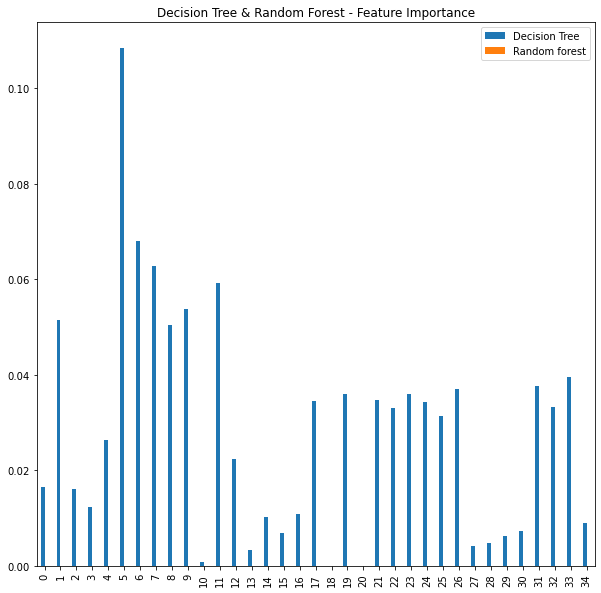

In [47]:
df1 = pd.DataFrame(gv_fi)
df1.plot(kind='bar',figsize = (10, 10))
plt.title('Decision Tree & Random Forest - Feature Importance')
plt.show()

From this plot we could see that using both Decision Tree and Random Forest, most important feature are AF_EXAC and AF_TGP.

# Naïve Bayes

In [48]:
minmax = MinMaxScaler()

In [49]:
numerical = gv_train_x.select_dtypes(exclude=['object']).columns

In [50]:
gv_train_x[numerical] = minmax.fit_transform(gv_train_x[numerical])

In [51]:
nb = MultinomialNB()

In [52]:
nb.fit(gv_train_x , gv_train_y)

MultinomialNB()

In [53]:
pred_nb = nb.predict(gv_test_x)
pred_nb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
tab_nb = confusion_matrix(pred_nb , gv_test_y)
tab_nb

array([[  17,    6],
       [9767, 3248]], dtype=int64)

In [55]:
acc_nb = (accuracy_score(pred_nb , gv_test_y))*100
acc_nb

25.04218438410799

# KNN

In [56]:
knn = KNeighborsClassifier()

In [57]:
Accuracy_list = []
number = []
for i in range(1,51):
    number.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(gv_train_x , gv_train_y)
    pred_knn = knn.predict(gv_test_x)
    Acc = (accuracy_score(pred_knn , gv_test_y))*100
    Accuracy_list.append(Acc)
accuracy = pd.DataFrame({"K_value":number , 'Accuracy':Accuracy_list})
accuracy

,K_value,Accuracy
0,1,63.721430
1,2,74.881117
2,3,69.880350
3,4,73.439178
4,5,72.035588
5,6,74.835097
6,7,74.152477
7,8,74.911796
8,9,74.282865
9,10,74.957816


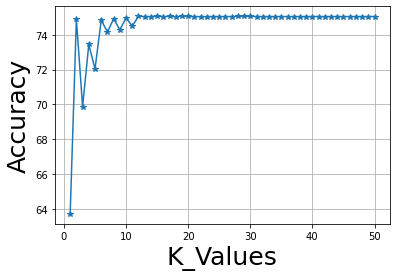

In [58]:
plt.plot(accuracy.K_value , accuracy.Accuracy , marker = '*');
plt.xlabel('K_Values' , size = 25)
plt.ylabel('Accuracy' , size = 25)
plt.grid()

In [59]:
knn = KNeighborsClassifier(n_neighbors = 12)

In [60]:
knn.fit(gv_train_x , gv_train_y)

KNeighborsClassifier(n_neighbors=12)

In [61]:
pred_knn = knn.predict(gv_test_x)
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
tab_knn = confusion_matrix(pred_knn , gv_test_y)
tab_knn

array([[9784, 3252],
       [   0,    2]], dtype=int64)

In [63]:
acc_knn = accuracy_score(pred_knn , gv_test_y)*100
acc_knn

75.05752416014727

# XG-BOOST

In [64]:
from xgboost import XGBClassifier

In [65]:
xgb = XGBClassifier()

In [66]:
xgb.fit(gv_train_x, gv_train_y)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
pred_xgb = xgb.predict(gv_test_x)
pred_xgb

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [68]:
tab_xgb = confusion_matrix(pred_xgb , gv_test_y)
tab_xgb

array([[5576, 1439],
       [4208, 1815]], dtype=int64)

In [69]:
acc_xgb = accuracy_score(pred_xgb , gv_test_y)*100
acc_xgb

56.68814235312164

# RESULTS

In [73]:
comp = pd.DataFrame({'Algorithm' : ['Logistic Regression' ,'Decision Tree', 'Random Forest' , 'Naive Bayes','KNN','XG-Boost'],
                        'Overall_Accuracy' : [acc_logreg ,acc_dtc, acc_rf , acc_nb , acc_knn,acc_xgb ]})

In [74]:
comp

,Algorithm,Overall_Accuracy
0,Logistic Regression,74.973155
1,Decision Tree,73.684614
2,Random Forest,80.150330
3,Naive Bayes,25.042184
4,KNN,75.057524
5,XG-Boost,56.688142


We will prefer Random Forest as it is giving us good accuracy as compared to other models.

There is a large amount of misclassification which can be seen on the average error report.